# Creating word vectors
Word embeddings are numerical representations of words that capture semantic relationships, allowing algorithms to understand and analyse text by treating words as vectors in a high-dimensional space. There are different ways to create word vectors. This demo gives a simple example with a view to showing that similar words end up closer to each other in a 2D space.

If you are interested in common approaches to creating word embeddings, the following provides some pointers for further study:

### Word2Vec
Word2Vec learns word embeddings by predicting context words from a target word (Skip-gram) or predicting a target word from its context (CBOW – Continuous Bag of Words). It does this by training a shallow neural network on a large text corpus.
- Skip-gram: Given a word, predict the words that appear around it.
- CBOW: Given surrounding words, predict the missing word.
- The result is a vector for each word, where words with similar meanings have similar vectors.

### GloVe (Global Vectors for Word Representation)
GloVe is based on word co-occurrence statistics across a large text corpus. Instead of training a neural network, it looks at how often words appear together in different contexts and creates vectors that best capture these patterns.
- Words that frequently appear in similar contexts will have similar vector representations.
- Unlike Word2Vec, which processes sentences sequentially, GloVe uses a matrix factorization approach on a word co-occurrence matrix.

### FastText
FastText is an extension of Word2Vec but improves upon it by representing words as subword units (character n-grams) rather than whole words.
- This means it can generate vectors for unseen words (useful for rare words or misspellings).
- It helps capture morphological similarities (e.g., "run," "running," and "runner" have similar representations).

### Transformer-based Embeddings (e.g., BERT, GPT)
Recent deep learning models use contextual word embeddings, meaning the representation of a word changes based on its surrounding words.
- BERT (Bidirectional Encoder Representations from Transformers): Uses a deep neural network that reads text in both directions to learn contextual meaning.
- GPT (Generative Pre-trained Transformer): Uses a transformer that processes text from left to right, generating meaningful word representations in context.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

## Define a small corpus of example documents

In [2]:
documents = [
    "the cat curled up on the soft blanket and purred gently",
    "a cat is a common pet just like a dog and enjoys chasing small toys",
    "a cat is a small domesticated animal that likes milk",
    "the loyal dog wagged its tail and ran to fetch the ball",
    "a dog is a playful pet much like a cat and loves spending time with its owner",
    "a dog is a loyal domesticated animal that barks",
    "she picked a juicy apple from the tree and took a crisp bite",
    "an apple is a sweet fruit and like a banana is often used in desserts",
    "an apple is a type of fruit that is often red or green and is a common ingredient in pies",
    "he peeled the ripe banana and added it to his morning cereal",
    "a banana is a soft fruit and is packed with healthy nutrients",
    "a banana is a yellow fruit rich in potassium and is a frequently used in smoothies",
    "the sleek car sped down the open road under the bright sun",
    "a car like a plane is a common vehicle used for travel",
    "a car is a vehicle with four wheels for road travel",
    "the large plane soared through the sky leaving a white trail behind",
    "a plane is a fast vehicle designed for long-distance travel"
    "a plane is a vehicle with wings that flies through the sky"
]

## Convert text to a numeric representation (TF-IDF vectors)

In [3]:
vectoriser = TfidfVectorizer()
tfidf_matrix = vectoriser.fit_transform(documents)

In [4]:
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(),
                  columns=vectoriser.get_feature_names_out()).T
tfidf_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
added,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.319273,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.000000
an,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.311002,0.239070,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.000000
and,0.157605,0.164259,0.000000,0.153092,0.147824,0.000000,0.154303,0.166262,0.127807,0.149038,0.186272,0.147060,0.0,0.0,0.000000,0.00000,0.000000
animal,0.000000,0.000000,0.372377,0.000000,0.000000,0.411691,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.000000
apple,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.258889,0.278954,0.214435,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wheels,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.405977,0.00000,0.000000
white,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.32579,0.000000
wings,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.248781
with,0.000000,0.000000,0.000000,0.000000,0.225918,0.000000,0.000000,0.000000,0.000000,0.000000,0.284678,0.000000,0.0,0.0,0.289629,0.00000,0.177483


In [5]:
words_of_interest = ['cat', 'dog', 'apple', 'banana', 'car', 'plane']
words_of_interest_df = tfidf_df.loc[words_of_interest]

words_of_interest_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
cat,0.240866,0.251034,0.304241,0.000000,0.225918,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000
dog,0.000000,0.251034,0.000000,0.233968,0.225918,0.336361,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000
apple,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.258889,0.278954,0.214435,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000
banana,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.254096,0.000000,0.227773,0.284678,0.22475,0.000000,0.000000,0.000000,0.00000,0.000000
car,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.233369,0.345285,0.317963,0.00000,0.000000
plane,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.345285,0.000000,0.25516,0.389692


## Reduce to 2D for Visualisation
We will use TruncatedSVD from Scikit-learn to reduce the dimensionality. When applied to tf-idf matrices, as we're doing here, this process is known as latent semantic analysis (LSA).

In [6]:
#df = tfidf_df
df = words_of_interest_df

In [7]:
svd = TruncatedSVD(n_components=2,
                   random_state=42)
embeddings_2d = svd.fit_transform(df)

embeddings_2d

array([[ 3.67443965e-17,  4.23292874e-01],
       [ 6.49608653e-16,  4.56612603e-01],
       [-3.15646936e-16,  8.34109395e-17],
       [-2.26400173e-16, -1.55086383e-18],
       [ 4.01068414e-01, -2.13521780e-16],
       [ 5.17437852e-01, -4.04465987e-16]])

## Plot the 2D points

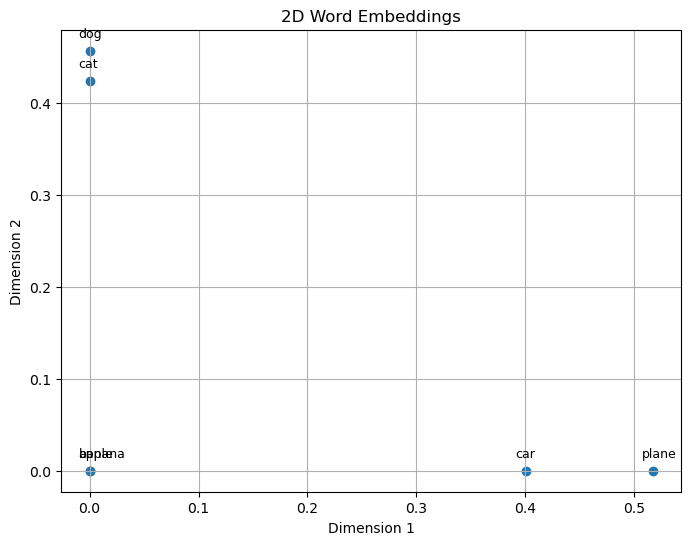

In [8]:
plt.figure(figsize=(8, 6))
x_coords = embeddings_2d[:, 0]
y_coords = embeddings_2d[:, 1]
plt.scatter(x_coords, y_coords)

for i, label in enumerate(df.index):
    plt.text(x_coords[i] - 0.01, y_coords[i] + 0.015, label, fontsize=9)

plt.title("2D Word Embeddings")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.grid(True)
plt.show()